In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
training = torchvision.datasets.FashionMNIST(root="./", train=True, download=True)
train_loader = torch.utils.data.DataLoader(training,shuffle=True)

testing = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, 
                                            transform=torchvision.transforms.Normalize((0), (1.0)))
testing_loader = torch.utils.data.DataLoader(testing, shuffle=True)

In [13]:
train  = train_loader.dataset.data[:600].float()
target = train_loader.dataset.targets[:600].float()

mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std

    
test  = train_loader.dataset.data[600:1200].float()
target_test = train_loader.dataset.targets[600:1200].float()

mean = test.mean(dim=0)
std = test.std(dim=0)
std[std==0]=1.0

for i in range(len(test)):
    test[i] = (test[i]-mean)/std

In [18]:
x_train = train.unsqueeze(1)
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, 4),
    torch.nn.MaxPool2d(kernel_size = 2),
    torch.nn.Conv2d(6, 1, 2),
    torch.nn.Linear(11, 10),
    torch.nn.Flatten(),
    torch.nn.Linear(110,10)
    
)
x_train = train.unsqueeze(1)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2) 
epochs = 60
loss_values = np.zeros(epochs)
F1_values_train = np.zeros(epochs)
F1_values_test = np.zeros(epochs)

for epoch in range(epochs):
    X_new = np.expand_dims(x_train, 1) 
    inputs = torch.autograd.Variable(torch.Tensor(x_train).float())
    targets = torch.autograd.Variable(torch.Tensor(target).long())
    optimizer.zero_grad()
    out = model(inputs)
    out = out.squeeze(dim=1)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, Y_predicted = torch.max(out.data, 1)
    loss_values[epoch] = loss.item()
    F1_values_train[epoch] = sklearn.metrics.f1_score(target, Y_predicted, average='macro')
    
    
    X_new = np.expand_dims(test, 1)
    inputs_test = torch.autograd.Variable(torch.Tensor(X_new).float())
    out_test = model(inputs_test)
    out_test = out_test.squeeze(dim=1)
    values, Y_predicted_test = torch.max(out_test.data, 1)
    F1_values_test[epoch] = sklearn.metrics.f1_score(target_test, Y_predicted_test, average='macro')

Text(0, 0.5, 'loss')

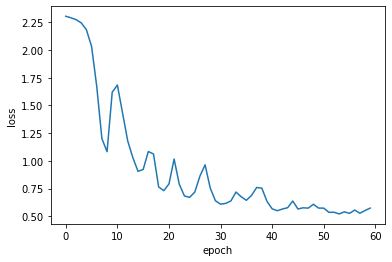

In [19]:
plt.plot(np.arange(epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')

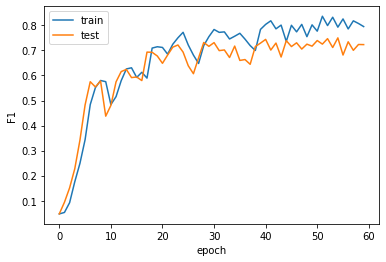

In [20]:
plt.plot(np.arange(epochs), F1_values_train, label='train')
plt.plot(np.arange(epochs), F1_values_test, label='test')
plt.xlabel('epoch')
plt.ylabel('F1')
plt.legend()